In [1]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
import ebf
import os

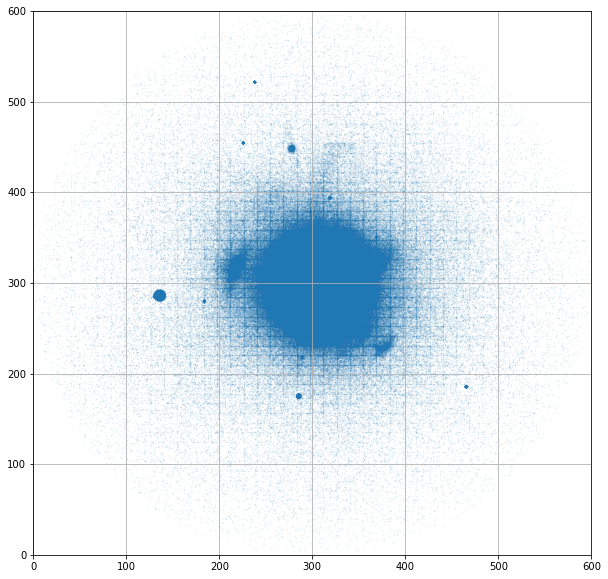

In [2]:
halo_table = Table.read('./halo02_4.0Mpc_h158_table.hdf5', path='data')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(halo_table['x_int'], halo_table['y_int'], alpha=.1, s=1, marker='.')
ax.axes.grid()
ax.set_xlim([0, 600])
ax.set_ylim([0, 600])
plt.show()

In [3]:
# remove bound sat stars
satprop = ebf.read('./satprop.ebf')
for table_fh in [f for f in os.listdir(os.path.curdir) if f.endswith('.hdf5')]:
    #print table_fh
    table = Table.read(table_fh, format='hdf5', path='data')
    #print len(table)
    for satid in range(int(table.meta['satid_start']), int(table.meta['satid_end'])):
        if satprop['bsat'][satid]:
            #print ' --> ', satid
            remove = np.nonzero(table['satids'] == satid)
            #print ' --> ', len(remove)
            table.remove_rows(remove)
    #print len(table)        
    table.write(table_fh, format='hdf5', path='data', overwrite=True)

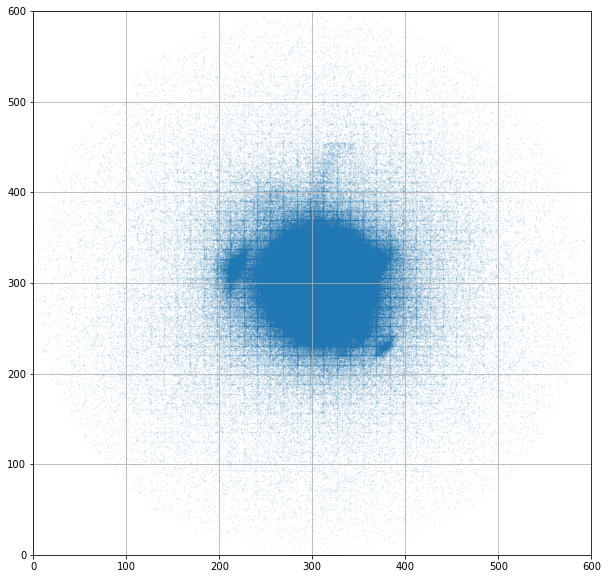

In [4]:
halo_table = Table.read('./halo02_4.0Mpc_h158_table.hdf5', path='data')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(halo_table['x_int'], halo_table['y_int'], alpha=.1, s=1, marker='.')
ax.axes.grid()
ax.set_xlim([0, 600])
ax.set_ylim([0, 600])
plt.show()

In [ ]:
for key in halo_table.meta.keys():
    print key, halo_table.meta[key]

In [ ]:
print halo_table

In [ ]:
len(satprop['bsat'][:112])

In [ ]:
def make_boxe(xy, size=10):
    '''
    box maker

    function to help the region selection function.
    makes a  set of box coord for the plot function to use.

    Arguments:
        xy {tupple} -- (x,y) center coords for new box

    Keyword Arguments:
        size {number} -- size of box in grid units
        (default: {100})
    '''
    # unpack & center x, y
    x, y = xy
    # TODO - auto center
    x += 300
    y += 300

    # split the length
    segment = (size * 0.5)

    # end of function
    return ((x - segment, x + segment), (y - segment, y + segment))

In [ ]:
xlims, ylims = make_boxe((-150,150), size=20)
x0, x1 = xlims
y0, y1 = ylims
print x0, x1, y0, y1

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(halo_table['x_int'], halo_table['y_int'], s=1, marker='s')
ax.axes.grid()
ax.set_xlim([0, 600])
ax.set_ylim([0, 600])
plt.show()

In [ ]:
idx = np.nonzero(
    np.logical_and(
        np.logical_and(
            halo_table['x_int'] >= x0, 
            halo_table['x_int'] <= x1),
        np.logical_and(
            halo_table['y_int'] >= y0, 
            halo_table['y_int'] <= y1)
    ))

In [ ]:
import os
os.listdir(os.path.curdir)

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(halo_table['x_int'][idx], halo_table['y_int'][idx], s=1, marker='s')
ax.axes.grid()
ax.set_xlim([0, 600])
ax.set_ylim([0, 600])
plt.show()

In [ ]:
from astropy.io import fits
hdu = fits.HDUList

In [ ]:
from simshow import simshow
simshow.